##### Analysis

Rural drivers account for only 2.6% of fall drivers but bring in 6.8% of the fares.

Fares for Rural and Suburban drivers tend to avg above 25 dollars per ride where urband drivers average under 25 dollars for most rides.

80.9% of all drivers ar eurban but they only account for 62.7% of the fares and 68.4% of all rides.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%matplotlib notebook

In [4]:
citydata = "raw_data/city_data.csv"
ridedata = "raw_data/ride_data.csv"

city = pd.read_csv(citydata)
ride = pd.read_csv(ridedata)

#city.head()
             

In [5]:
merge_data = pd.merge(ride, city, on='city')

#merge_data.head()

In [6]:
city_ridecount = ride['city'].value_counts()
#city_ridecount.head(120)

In [7]:
group_fare = ride.groupby(['city'])

avg_fare = group_fare['fare'].mean()

#avg_fare.head(10)


In [8]:
summary = pd.DataFrame({'Average Fare': avg_fare,
                       'Ride Count': city_ridecount})
summary2 = summary.reset_index()
summary2.head()
summary3 = summary2.rename(columns={'index':"city"})
#summary3.head()



In [18]:
merge_data2 = pd.merge(summary3, city, on='city')

mergedata3 =merge_data2.rename(columns={'type': 'City Type'})
mergedata3.head()

,city,Average Fare,Ride Count,driver_count,City Type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


<IPython.core.display.Javascript object>


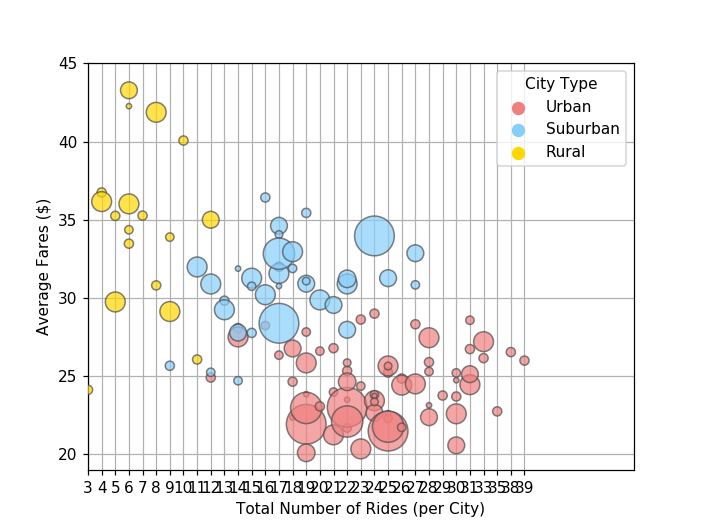

In [21]:

sns.stripplot(x="Ride Count", y="Average Fare", data=mergedata3, palette=["lightcoral", "lightskyblue", "gold"], 
              s=merge_data2['driver_count'] * .5, hue='City Type', linewidth=1, alpha=.7)


plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fares ($)')



plt.xlim(0,40)
plt.ylim(19,45)
plt.grid(True)



In [22]:
total_fares = merge_data['type'].value_counts()

#total_fares.head()

In [23]:
total_fare = merge_data.groupby(['type'])

total = total_fare['fare'].sum()

#total.head(10)

<IPython.core.display.Javascript object>


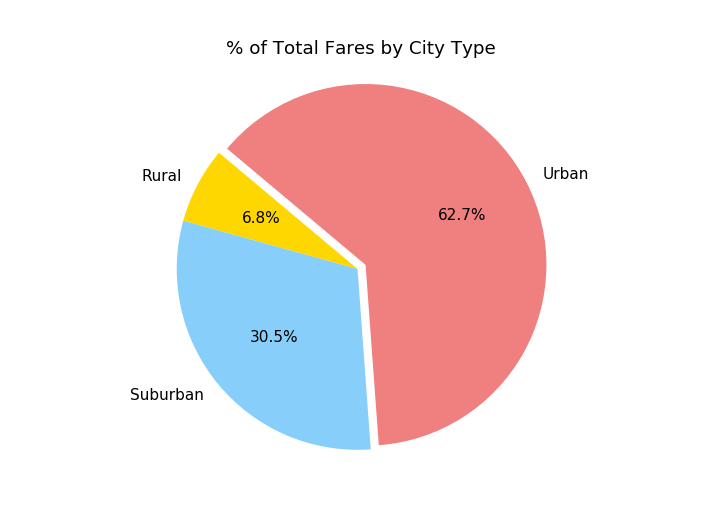

Text(0.5,1,'% of Total Fares by City Type')

In [24]:
total_sum = merge_data['fare'].sum()


#print(total_sum)

percent = total / total_sum
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.05)

plt.pie(percent,colors = ["gold", "lightskyblue", "lightcoral"],  autopct="%1.1f%%", startangle=140, explode=explode, labels=labels)
plt.axis("equal") 
plt.title('% of Total Fares by City Type')

<IPython.core.display.Javascript object>


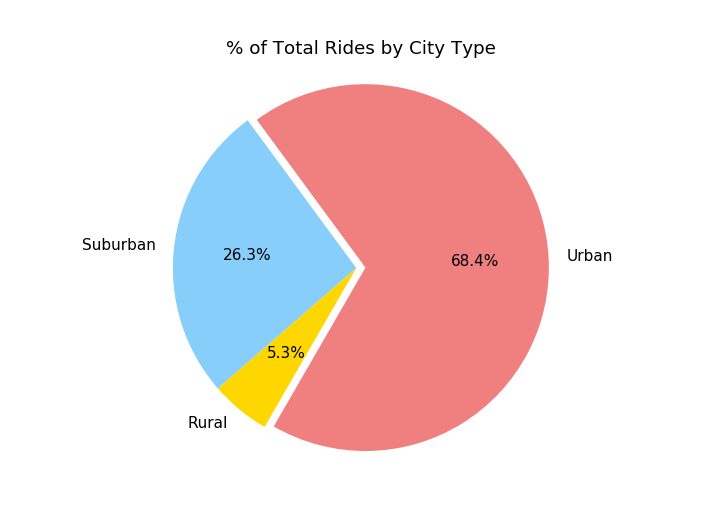

Text(0.5,1,'% of Total Rides by City Type')

In [25]:
total_count = merge_data['type'].count()
total_count
percentrides = total_fares / total_count

#print(percentrides.head())


labels = ['Urban', 'Suburban', 'Rural']
explode = (0.05,0,0)

plt.pie(percentrides,colors = ["lightcoral", "lightskyblue", "gold"],  autopct="%1.1f%%", startangle=240, explode=explode, labels=labels)
plt.axis("equal") 
plt.title('% of Total Rides by City Type')

<IPython.core.display.Javascript object>


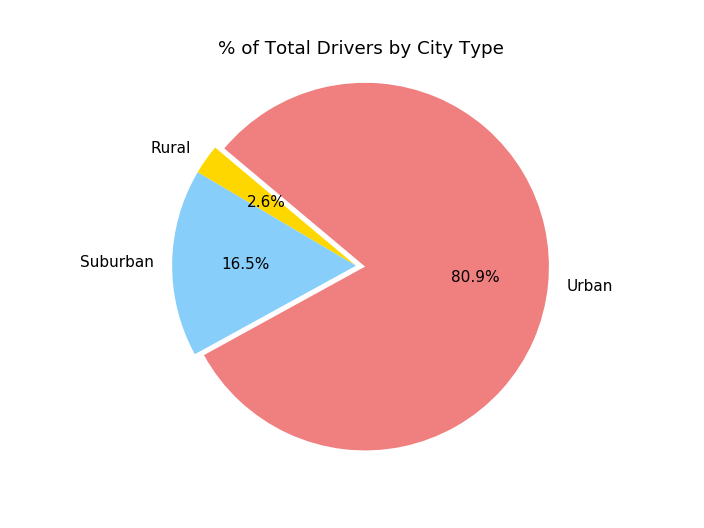

Text(0.5,1,'% of Total Drivers by City Type')

In [27]:
alldrivers = city['driver_count'].sum()

drivertotal = city.groupby(['type'])
totaldrivers = drivertotal['driver_count'].sum()
#print(drivertotal.head())
#totaldrivers.head()

driverpercentage = totaldrivers / alldrivers

#driverpercentage


labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.05)


plt.pie(driverpercentage,colors = ["gold", "lightskyblue", "lightcoral"],  autopct="%1.1f%%", startangle=140, explode=explode, labels=labels)
plt.axis("equal") 
plt.title('% of Total Drivers by City Type')